In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# setting up styles for visualizations
sns.set(style="whitegrid")

# importing models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Files for Colab/heart.csv")

Mounted at /content/drive


The dataset contains the following columns:

1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) Value 0 = < diameter narrowing (less chance of heart disease)- Value 1 = > 50% diameter narrowing (more chance of heart disease)

**Looking at the target variable and the features we will be using Decision Tree to predict whether someone has high chance of heart disease or a low chance of heart disease**

1. Data Loading and Initial Exploration: Load the dataset and get an overview of its structure and contents.
2. Exploratory Data Analysis (EDA): Perform an in-depth analysis to understand the data better.
3. Data Preprocessing: Prepare the data for modeling, including handling missing values, encoding categorical variables, and normalization.
4. Decision Tree Model: Build and train the Decision Tree model.
5. Model Evaluation: Evaluate the model's performance using appropriate metrics.
6. Conclusion: Summarize the findings and possible next steps.

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


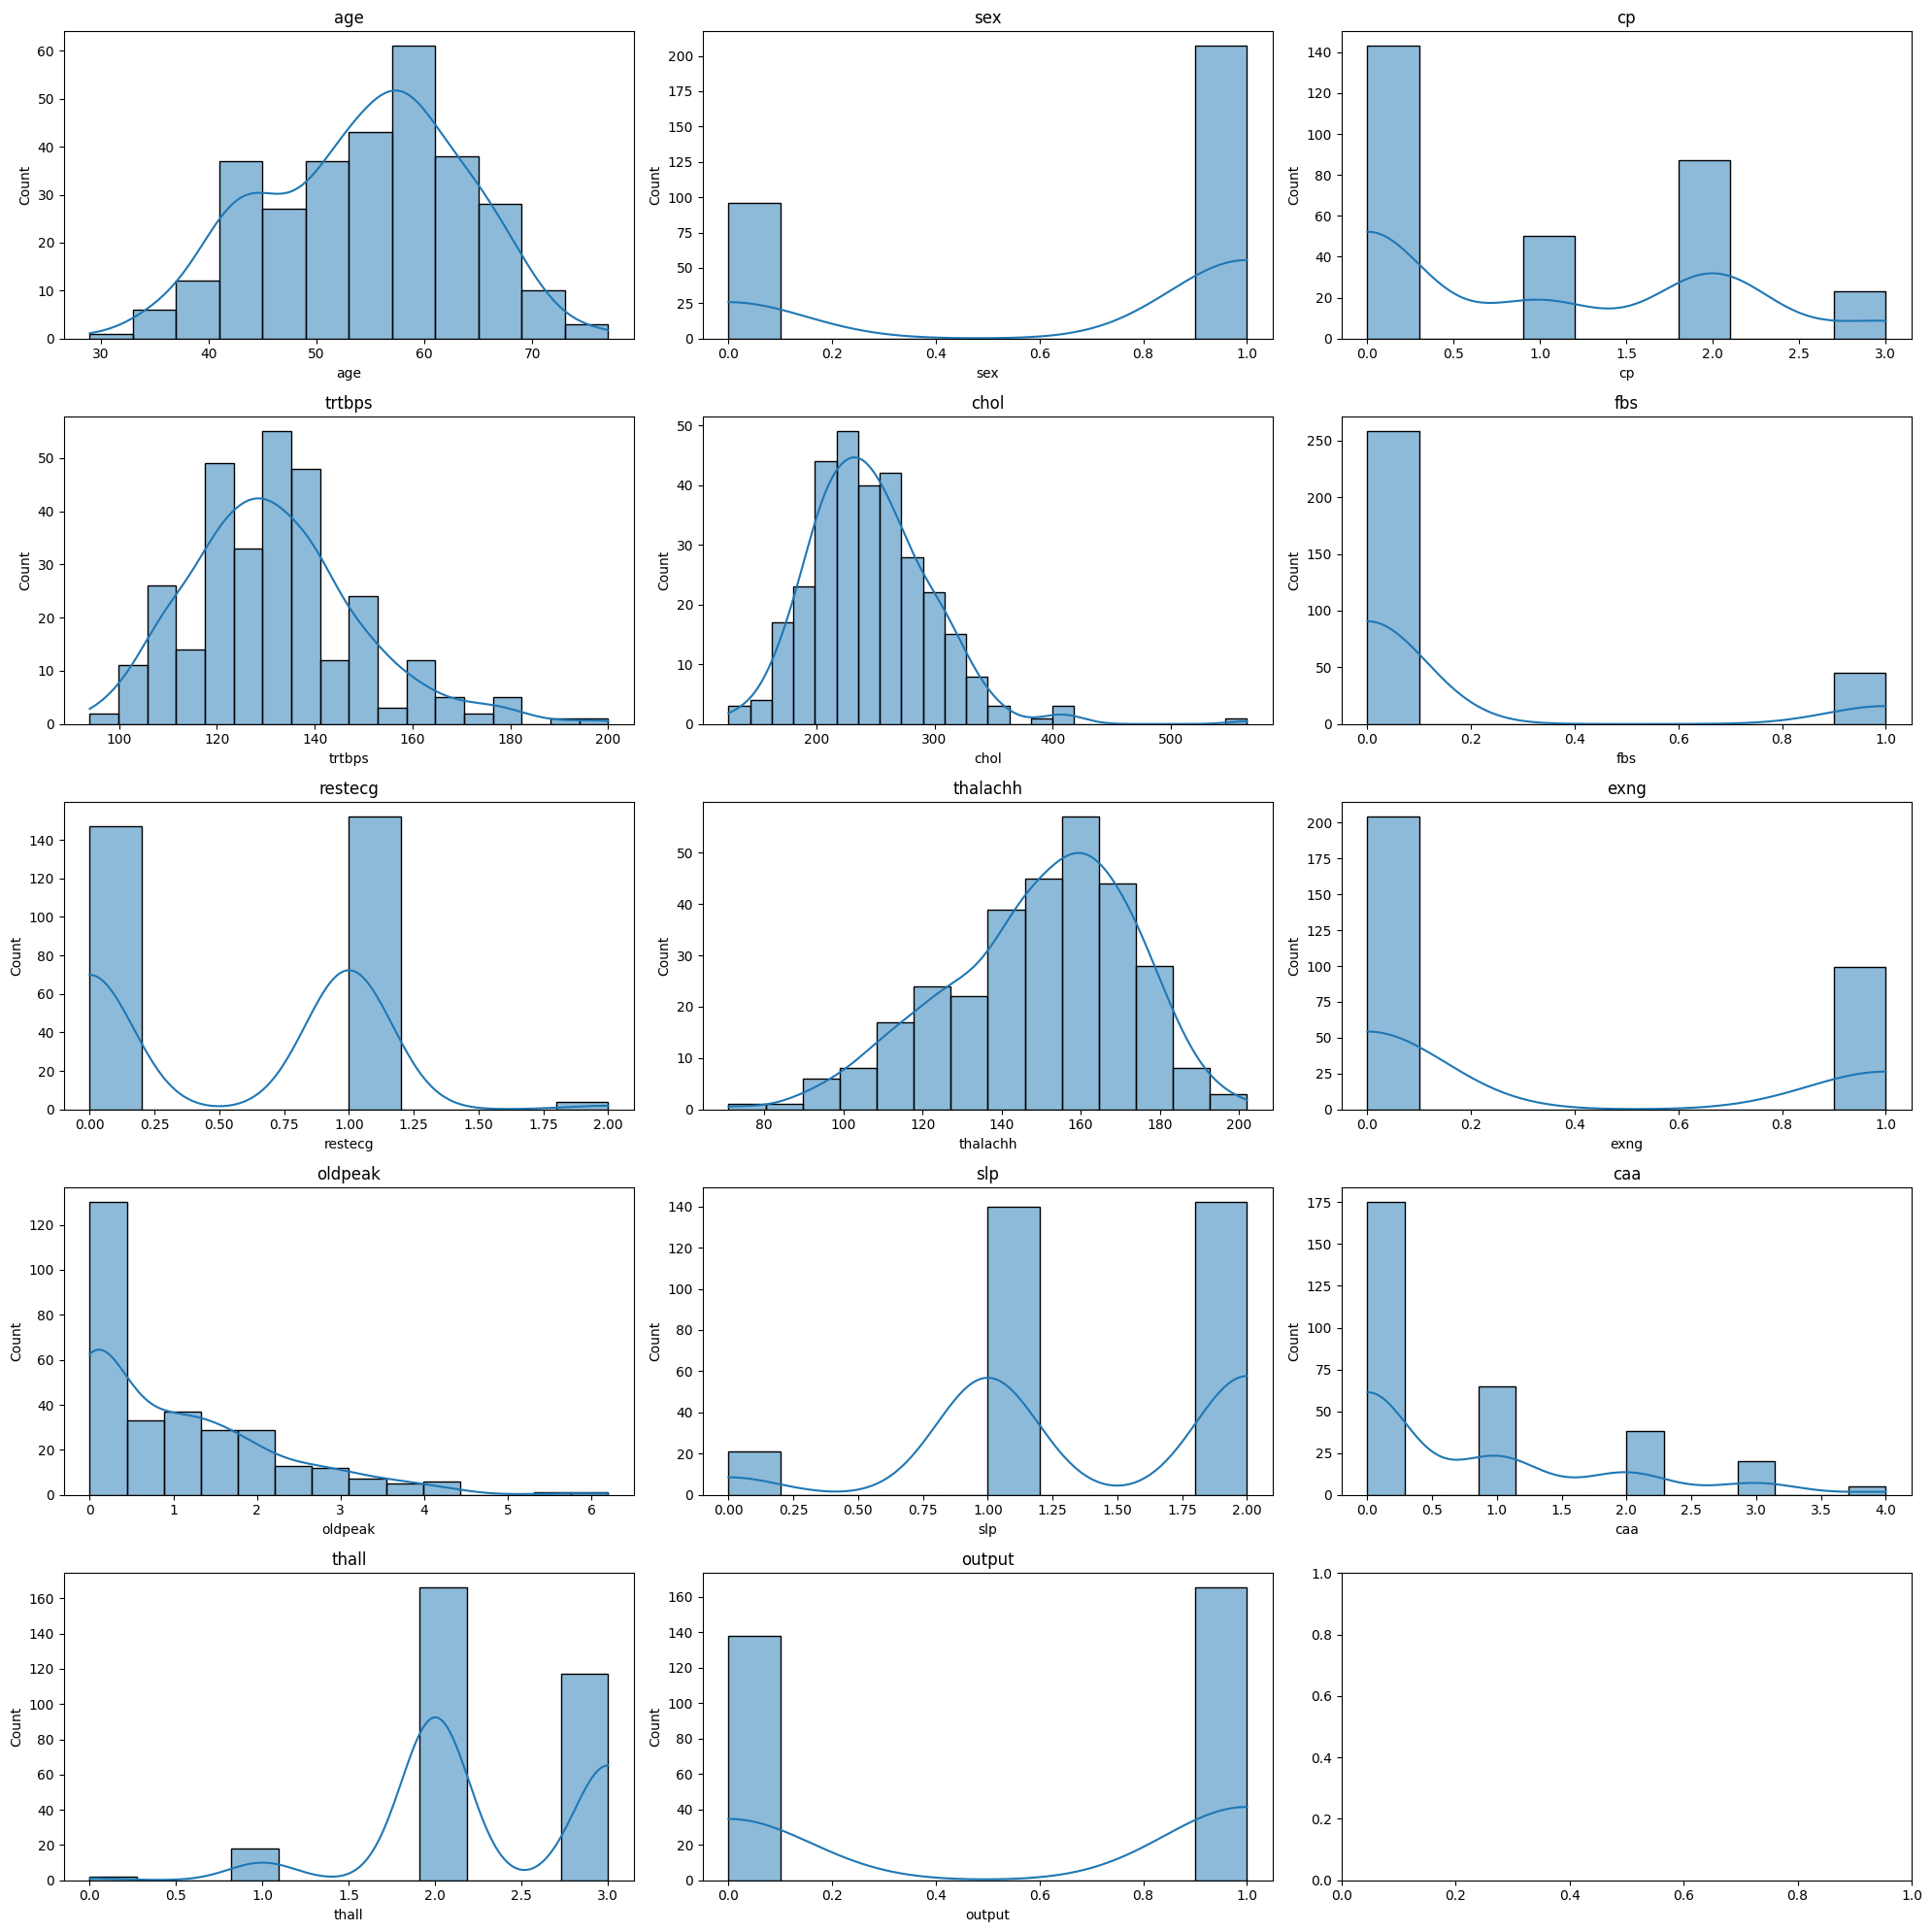

In [ ]:
# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary
**Missing Values:** There are no missing values in any of the columns of the dataset.

**Summary Statistics:**
The age ranges from 29 to 77 years with an average of approximately 54 years.

The sex column indicates a higher proportion of male (1) participants.

cp (chest pain type), restecg (resting electrocardiographic results), and thall (thallium stress test result) have values that correspond to different categories.

Blood pressure (trtbps), cholesterol (chol), and heart rate (thalachh) show a wide range of values.

**Distributions:**
Most of the features show a varied distribution. For instance, chol and thalachh appear to follow a somewhat normal distribution.
Binary features like sex, fbs, and exng have distinct peaks corresponding to their two categories.


***The above text has been copied from ChatGPT***

**The following features need to be encoded:**

cp (Chest Pain Type): Has values [3, 2, 1, 0], representing different types of chest pain. This is a nominal categorical variable.

restecg (Resting Electrocardiographic Results): Has values [0, 1, 2], representing different categories of ECG results. This is a nominal categorical variable.

slp (Slope of the Peak Exercise ST Segment): Contains values [0, 2, 1], which are categories of ST segment slope. This is a nominal categorical variable.

caa (Number of Major Vessels): Contains values [0, 2, 1, 3, 4], representing the number of major vessels colored by fluoroscopy. While this could be treated as a numerical variable, it often functions as a categorical variable in medical datasets.

thall (Thallium Stress Test Result): Includes values [1, 2, 3, 0], which are different categories of thallium stress test results. This is a nominal categorical variable.

In [ ]:
# Encoding the identified categorical variables
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thall', 'slp', 'caa'], drop_first=True)

# Displaying the first few rows of the encoded dataframe
df_encoded.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Creating a StandardScaler object
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Applying StandardScaler only to the specified columns
df_scaled = df_encoded.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display the first few rows of the scaled dataframe
df_scaled.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,restecg_1,restecg_2,thall_1,thall_2,thall_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


### Splitting the data into training and testing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_scaled.drop('output', axis=1)
y = df_scaled['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.7377049180327869, 0.6885245901639344)

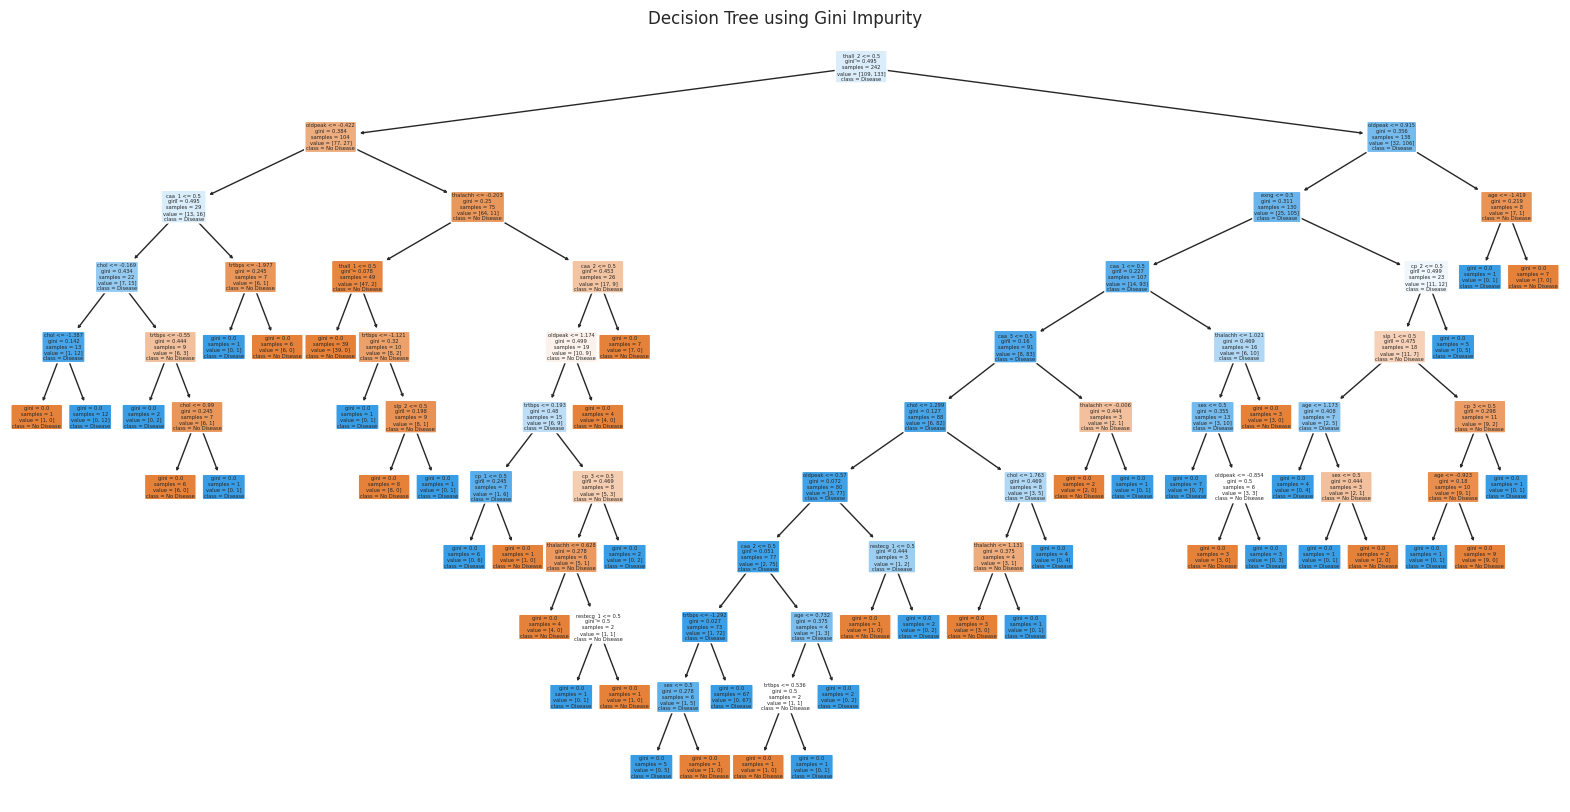

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_gini and dt_entropy are the trained Decision Tree models

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.savefig('/content/drive/My Drive/Files for Colab/Decision_Tree_Gini.pdf')
plt.show()
plt.close()

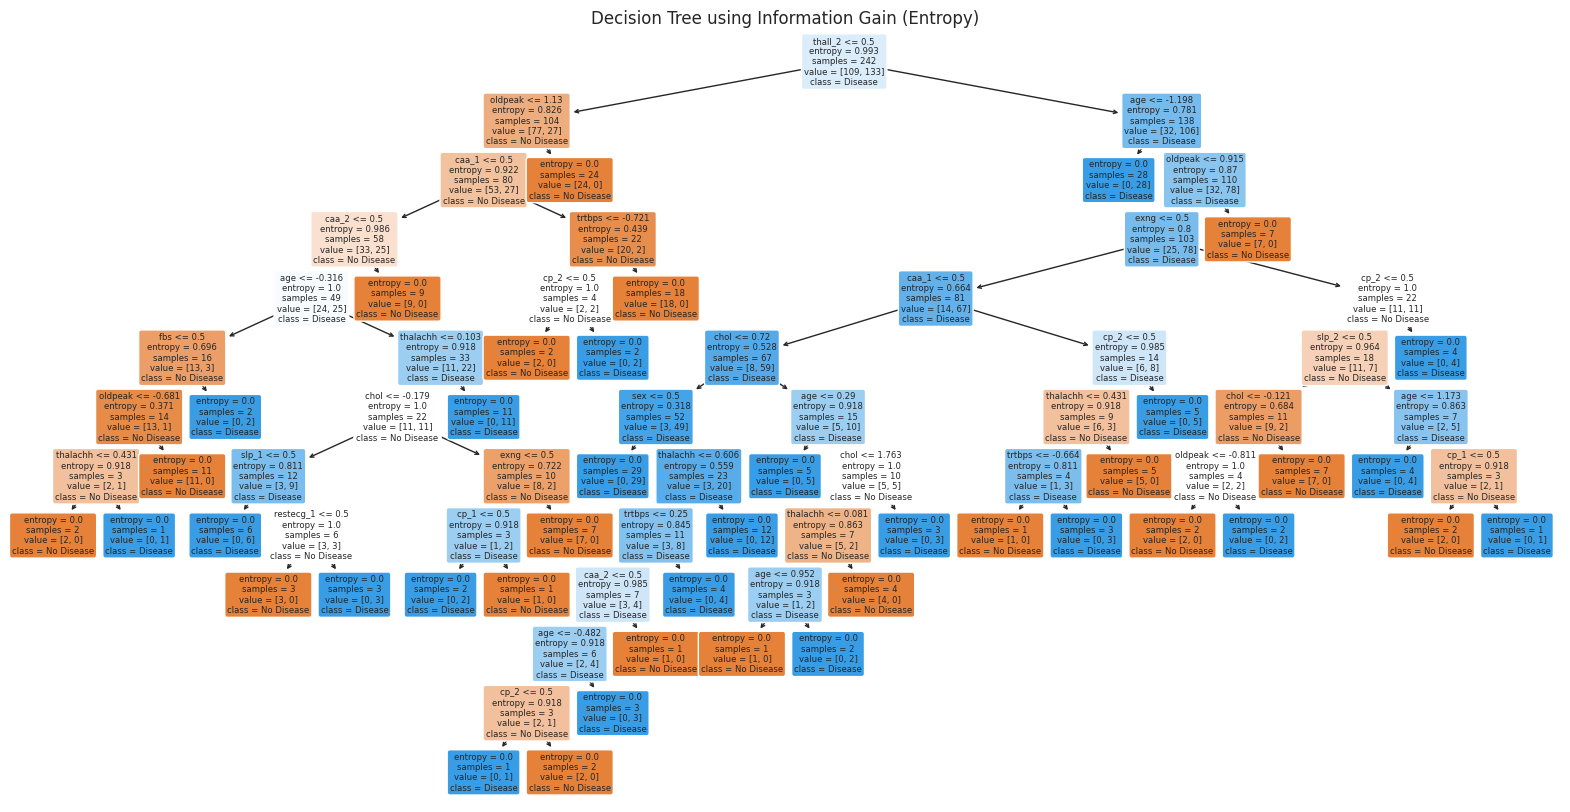

In [ ]:
# Visualizing the Decision Tree using Information Gain (Entropy)
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.savefig('/content/drive/My Drive/Files for Colab/Decision_Tree_Entropy.pdf')
plt.show()
plt.close()

The Decision Tree models have been successfully applied to your dataset using both Gini impurity and Information Gain (Entropy) as criteria. Here are the results:

1. Decision Tree with Gini Impurity Criterion:  
Accuracy on the test set: Approximately 73.77%

2. Decision Tree with Information Gain (Entropy) Criterion:  
Accuracy on the test set: Approximately 68.85%

These results indicate that the Decision Tree model with Gini impurity as the criterion performed slightly better on this dataset compared to the one using Information Gain (Entropy).

### How to evaluate a classification model?

To evaluate the performance of the Decision Tree models in more detail, we can look at various evaluation metrics, including the confusion matrix, precision, recall, F1 score, and the ROC curve. These metrics provide a more comprehensive understanding of the model's performance than accuracy alone.

**Confusion Matrix:**
The confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows us to visualize the model's predictions in terms of true positives, true negatives, false positives, and false negatives.


**Precision:** The ratio of correctly predicted positive observations to the total predicted positives.

**Recall (Sensitivity):** The ratio of correctly predicted positive observations to the all observations in actual class.

**F1 Score:** The weighted average of Precision and Recall.

**ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The Area Under the Curve (AUC) represents a model's ability to discriminate between positive and negative classes.

### Precision vs Recall

If you are confused between precision and recall, let's consider an example in the context of email spam detection:

•	Suppose we have 100 emails, where 20 are spam and 80 are not spam.  
•	A spam detection model is used to identify these emails, and it identifies 15 emails as spam.  
•	Out of these 15 identified as spam, 10 are actually spam, and 5 are not (but were incorrectly labeled as spam).  
•	Also, out of the 20 actual spam emails, the model correctly identified 10, but missed 10.  


Now let's calculate precision and recall:

•	Precision: Out of the 15 emails the model identified as spam, 10 are actually spam. So, precision is 10/15 ≈ 0.671510 ≈ 0.67 or 67%. This means that when the model predicts an email is spam, it is correct about 67% of the time.

•	Recall: There are 20 actual spam emails, and the model correctly identified 10 of them. So, recall is 10/20 = 0.52010 = 0.5 or 50%. This means the model is able to correctly identify 50% of all actual spam emails.

In this example precision tells us how accurate the model's predictions are (i.e., when it says something is spam, how often is it right?), while recall tells us how good the model is at detecting spam emails (i.e., does it catch most of the spam emails?).


### Gini coefficient vs Information Gain
The Gini coefficient is a measure of inequality in a distribution, typically of income or wealth, while information gain is a measure of the effectiveness of a particular attribute in splitting a dataset, thereby reducing its entropy.

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[22  7]
 [ 9 23]]
Precision: 0.77
Recall: 0.72
F1 Score: 0.74
ROC AUC: 0.74

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[21  8]
 [11 21]]
Precision: 0.72
Recall: 0.66
F1 Score: 0.69
ROC AUC: 0.69


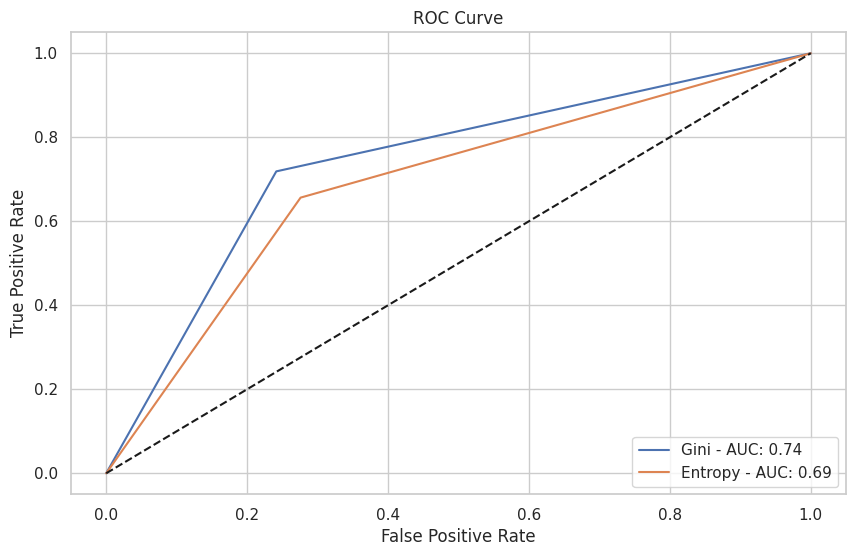

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Evaluation Metrics for Decision Tree Models**
#### **Gini Model:**
Confusion Matrix:  
True Positives (TP): 23  
True Negatives (TN): 22  
False Positives (FP): 7  
False Negatives (FN): 9

Precision: Approximately 76.67%

Recall: Approximately 71.88%

F1 Score: Approximately 74.19%

ROC AUC: Approximately 73.87%

#### **Entropy Model:**
Confusion Matrix:  
True Positives (TP): 21  
True Negatives (TN): 21  
False Positives (FP): 8  
False Negatives (FN): 11  

Precision: Approximately 72.41%

Recall: Approximately 65.62%

F1 Score: Approximately 68.85%

ROC AUC: Approximately 69.02%


#### **ROC Curve**
The Receiver Operating Characteristic (ROC) curve is plotted above.
The Area Under the Curve (AUC) for the Gini model is approximately 73.87%, and for the Entropy model, it's approximately 69.02%.
Interpretation:
The Gini model shows slightly better performance across most metrics compared to the Entropy model.
Both models have similar ROC AUC scores, indicating comparable ability in distinguishing between classes.
Precision, Recall, and F1 Score are balanced for both models, but the Gini model has a slight edge.

## Feature Importance:

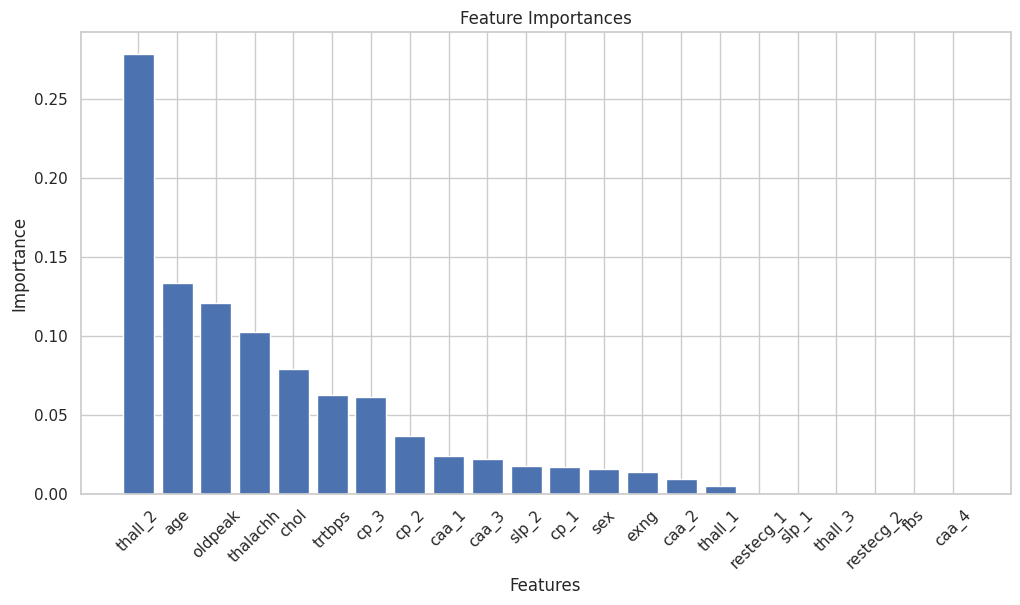

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

X = df_encoded.drop('output', axis=1)
y = df_encoded['output']

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()


## Pruning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select the important features and the target variable
important_features = ['thall_2', 'age', 'oldpeak', 'thalachh', 'chol', 'trtbps', 'cp_3', 'output']
df_selected_features = df_encoded[important_features]

# Splitting the data
X = df_selected_features.drop('output', axis=1)
y = df_selected_features['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Model with Gini impurity
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

# Training the Decision Tree Model with Information Gain (Entropy)
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

# Making predictions and evaluating the Gini model
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Making predictions and evaluating the Entropy model
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print out the accuracies for both models
print("Accuracy with Gini impurity:", accuracy_gini)
print("Accuracy with Information Gain (Entropy):", accuracy_entropy)


Accuracy with Gini impurity: 0.6557377049180327
Accuracy with Information Gain (Entropy): 0.6721311475409836


**New Scores (After Feature Selection):**  
Accuracy with Gini Impurity: 65.57%  
Accuracy with Information Gain (Entropy): 67.21%  

**Previous Scores (Before Feature Selection):**
Accuracy with Gini Impurity: Approximately 73.77%
Accuracy with Information Gain (Entropy): Approximately 68.85%

**Comparison and Analysis:**  
**Decrease in Accuracy:** There's a noticeable decrease in accuracy for both models after feature selection. This suggests that some of the excluded features might have been contributing valuable information to the model.

**Gini vs. Entropy:** In both scenarios (before and after feature selection), the model using Information Gain (Entropy) has a slightly higher accuracy compared to the one using Gini impurity. This pattern remains consistent.

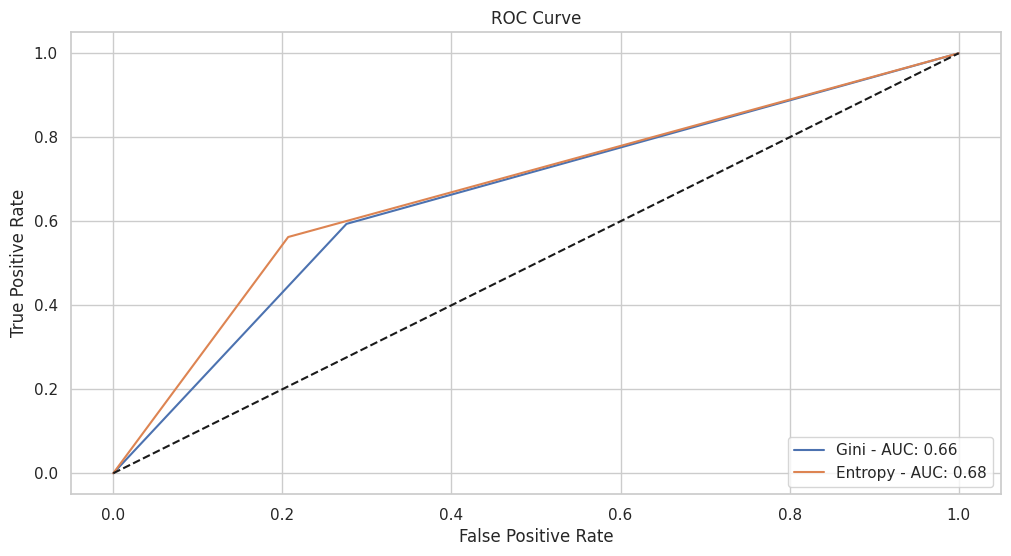

Gini Model Metrics:
Precision: 0.7037037037037037
Recall: 0.59375
F1 Score: 0.6440677966101694
Confusion Matrix:
 [[21  8]
 [13 19]]
ROC AUC: 0.6589439655172413

Entropy Model Metrics:
Precision: 0.75
Recall: 0.5625
F1 Score: 0.6428571428571429
Confusion Matrix:
 [[23  6]
 [14 18]]
ROC AUC: 0.677801724137931


In [ ]:
# Calculating evaluation metrics for the Gini model
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Calculating evaluation metrics for the Entropy model
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# ROC Curves
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini - AUC: {roc_auc_gini:.2f}')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy - AUC: {roc_auc_entropy:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated metrics for Gini model
print("Gini Model Metrics:")
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_score_gini)
print("Confusion Matrix:\n", confusion_matrix_gini)
print("ROC AUC:", roc_auc_gini)

# Print the calculated metrics for Entropy model
print("\nEntropy Model Metrics:")
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_score_entropy)
print("Confusion Matrix:\n", confusion_matrix_entropy)
print("ROC AUC:", roc_auc_entropy)